<a href="https://colab.research.google.com/github/alinsimon/data602/blob/master/08_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

I decided to use "2014 Yellow Taxi Trip Data" from NYC Open Data, the last time that this dataset was updated it was on December 2024. Each observation represents a trip in the yellow taxi. In this dataset we can get information about pick-up and drop-off dates/times, pick-up and drop-off taxi zone locations, trip distances, itemized fares, rate types, payment types, and passenger counts.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



The first step is to load the data into a dataframe

In [39]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/gkne-dk5s.csv?$limit=1000')

In [28]:
df.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,total_amount,imp_surcharge,extra,rate_code
0,CMT,2014-01-15T15:08:54.000,2014-01-15T15:20:30.000,1,2.30,-73.962347,40.779076,N,-73.956906,40.802308,CSH,10.5,0.5,0.0,0.0,11.0,0.0,NaN,1
1,VTS,2014-06-03T13:18:00.000,2014-06-03T13:21:00.000,1,0.68,-73.991030,40.751102,NaN,-74.001995,40.755880,CSH,4.0,0.5,0.0,0.0,4.5,0.0,NaN,1
2,VTS,2014-07-21T19:47:00.000,2014-07-21T19:59:00.000,1,2.57,-73.989182,40.747762,NaN,-73.982095,40.773610,CSH,11.0,0.5,0.0,0.0,12.5,1.0,NaN,1


then validate the available columns

In [40]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'mta_tax', 'tip_amount', 'tolls_amount',
       'total_amount', 'imp_surcharge', 'extra', 'rate_code'],
      dtype='object')

Now I will get the summary statistics

In [41]:
df.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,mta_tax,tip_amount,tolls_amount,total_amount,imp_surcharge,extra,rate_code
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,0.0,1000.000
mean,1.738000,2.958160,-72.643312,40.015666,-72.420393,39.895676,12.656000,0.497000,1.529050,0.26334,15.262880,0.315500,NaN,1.030
std,1.384656,3.520881,9.840028,5.420426,10.612033,5.846129,10.556235,0.038633,2.492422,1.18691,12.882566,0.354733,NaN,0.263
min,1.000000,0.000000,-74.017081,0.000000,-74.177877,0.000000,2.500000,0.000000,0.000000,0.00000,3.000000,0.000000,NaN,1.000
25%,1.000000,1.070000,-73.992111,40.732287,-73.991014,40.734392,6.500000,0.500000,0.000000,0.00000,8.300000,0.000000,NaN,1.000
50%,1.000000,1.800000,-73.982143,40.751757,-73.980409,40.752332,9.500000,0.500000,1.000000,0.00000,11.500000,0.000000,NaN,1.000
75%,2.000000,3.230000,-73.968710,40.765663,-73.962879,40.766993,14.500000,0.500000,2.100000,0.00000,16.812500,0.500000,NaN,1.000
max,6.000000,36.920000,0.000000,40.823455,0.000000,41.012501,130.000000,0.500000,45.000000,10.66000,169.160000,1.000000,NaN,5.000


Validate the payment_type that was most used in the trips

In [42]:
df.payment_type.value_counts()


,count
payment_type,
CRD,590
CSH,402
UNK,5
NOC,2
DIS,1


# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

1.  Remove any column that we will not use

In [43]:
df = df.drop(['store_and_fwd_flag'], axis=1)

2.   Remove duplicate rows

In [44]:
df = df.drop_duplicates()

3.   Remove rows with complete empty columns

In [45]:
df = df.dropna(how='all')

4. Validate the structure to fix any data type

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vendor_id          1000 non-null   object 
 1   pickup_datetime    1000 non-null   object 
 2   dropoff_datetime   1000 non-null   object 
 3   passenger_count    1000 non-null   int64  
 4   trip_distance      1000 non-null   float64
 5   pickup_longitude   1000 non-null   float64
 6   pickup_latitude    1000 non-null   float64
 7   dropoff_longitude  1000 non-null   float64
 8   dropoff_latitude   1000 non-null   float64
 9   payment_type       1000 non-null   object 
 10  fare_amount        1000 non-null   float64
 11  mta_tax            1000 non-null   float64
 12  tip_amount         1000 non-null   float64
 13  tolls_amount       1000 non-null   float64
 14  total_amount       1000 non-null   float64
 15  imp_surcharge      1000 non-null   float64
 16  extra              0 non-

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

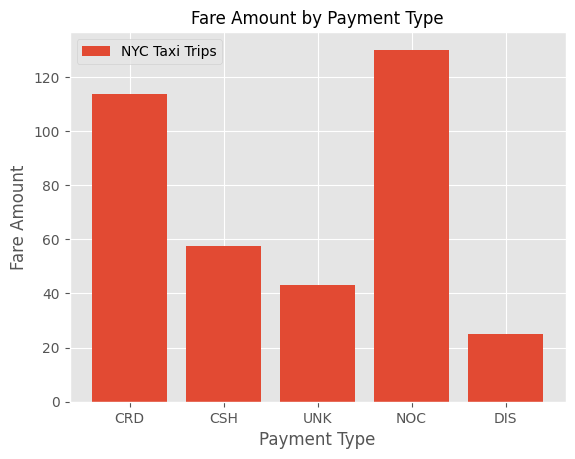

In [104]:
plt.bar(df.payment_type,df.fare_amount, label ='NYC Taxi Trips')
plt.title('Fare Amount by Payment Type', fontsize = 12)
plt.xlabel('Payment Type', fontsize = 12)
plt.ylabel('Fare Amount', fontsize = 12)
plt.style.use('ggplot')
plt.legend()
plt.show()

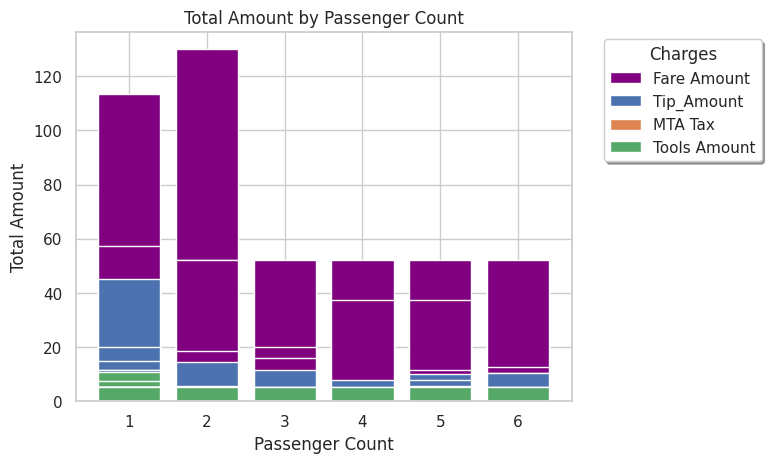

In [126]:
plt.bar(df.passenger_count,df.fare_amount,label ='Fare Amount', color='purple')
plt.bar(df.passenger_count,df.tip_amount, label ='Tip_Amount')
plt.bar(df.passenger_count,df.mta_tax,label ='MTA Tax')
plt.bar(df.passenger_count,df.tolls_amount, label ='Tools Amount')
plt.legend(title='Charges', bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True)
plt.title('Total Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Total Amount')
plt.style.use('ggplot')
plt.show()

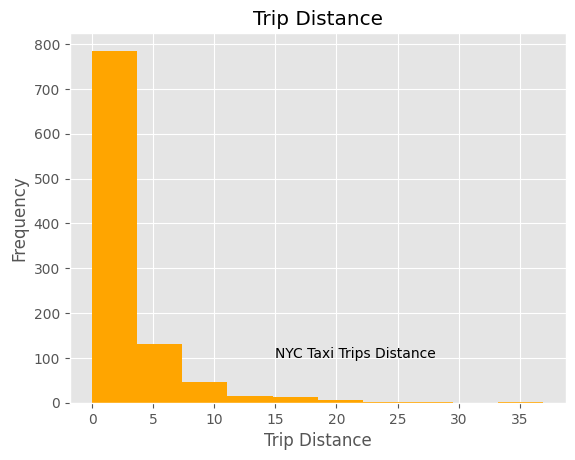

In [99]:
plt.hist(df.trip_distance,color='orange')
plt.title('Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.text(15,100,"NYC Taxi Trips Distance")
plt.show()

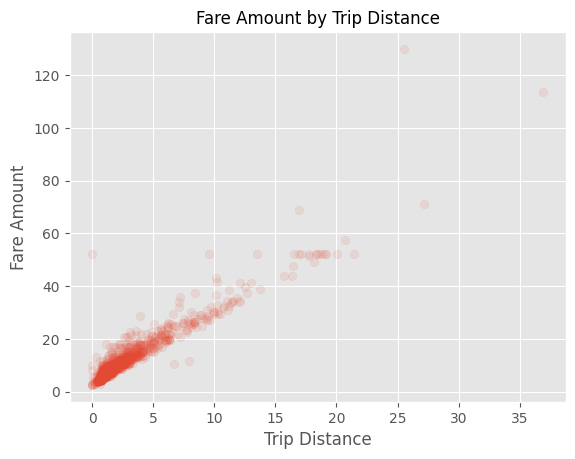

In [101]:
plt.scatter(df.trip_distance,df.fare_amount, label ='NYC Taxi Trips',alpha=0.1)
plt.title('Fare Amount by Trip Distance', fontsize = 12)
plt.xlabel('Trip Distance', fontsize = 12)
plt.ylabel('Fare Amount', fontsize = 12)
plt.style.use('ggplot')
plt.show()

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


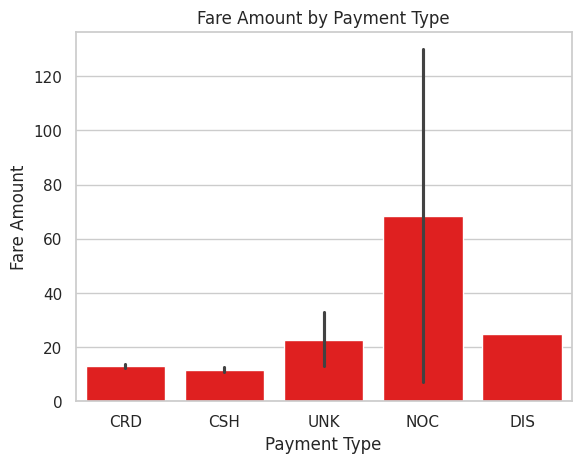

In [110]:
sns.barplot(x='payment_type', y='fare_amount', data=df, color='red')
plt.title('Fare Amount by Payment Type', fontsize=12)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Fare Amount', fontsize=12)
plt.show()

This bar chart represents the available payment types and the fare amounts paid using each type. From the chart, we can determine that NOC was the most commonly used payment method. The middle line represents the average fare amount.

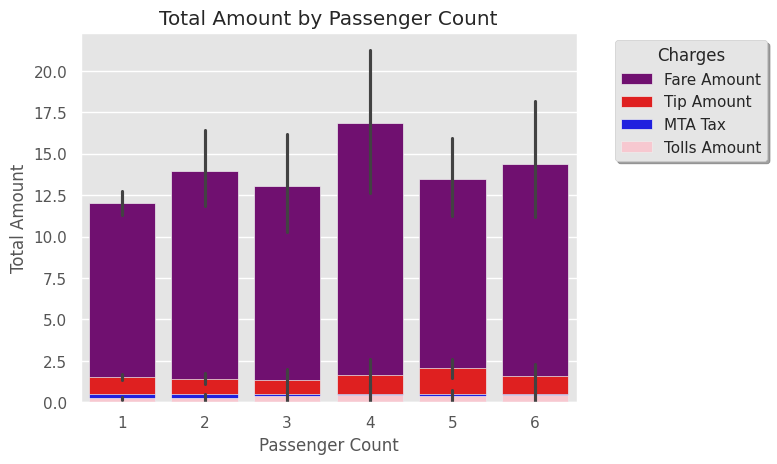

In [129]:
sns.barplot(x='passenger_count', y='fare_amount', data=df, color='purple',label ='Fare Amount')
sns.barplot(x='passenger_count', y='tip_amount', data=df, color='red',label ='Tip Amount')
sns.barplot(x='passenger_count', y='mta_tax', data=df, color='blue',label ='MTA Tax')
sns.barplot(x='passenger_count', y='tolls_amount', data=df, color='pink',label ='Tolls Amount')
plt.title('Total Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Total Amount')
plt.legend(title='Charges', bbox_to_anchor=(1.4, 1), loc='upper right', shadow=True)
plt.style.use('ggplot')
plt.show()

In this bar chart, we can see that the **fare amount** is the largest payment made on a trip, followed by the **tip amount**.

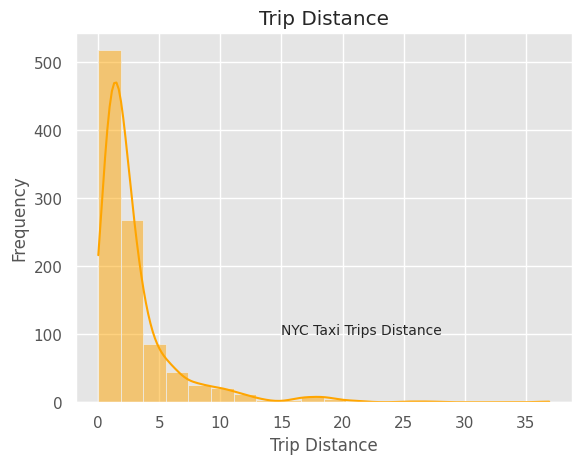

In [134]:
sns.histplot(df.trip_distance, bins=20, kde=True, color='orange')
plt.title('Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.text(15,100,"NYC Taxi Trips Distance")
plt.show()

In the NYC Trips histogram, we can see that it is right-skewed, which means that as the distance increases, the frequency of trips decreases.

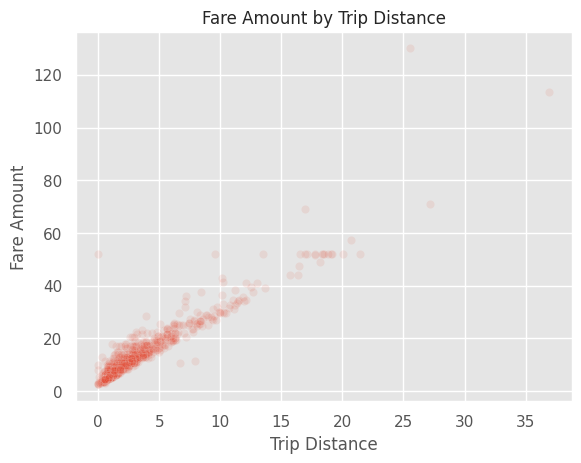

In [132]:
sns.scatterplot(data=df, x='trip_distance', y='fare_amount',alpha=0.1)
plt.title('Fare Amount by Trip Distance', fontsize = 12)
plt.xlabel('Trip Distance', fontsize = 12)
plt.ylabel('Fare Amount', fontsize = 12)
plt.style.use('ggplot')
plt.show()

In the scatter plot, we can observe that there are more trips with shorter distances and lower fare amounts.

### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

It looks to me that Seanborn simplifies the creation of plots and it has a better visualization, making it easier to interpret data without extensive customization.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

In conclusion, we can determine that the majority of trips were short-distance, with most being paid using NOC. Among the total charges, the fare amount is the highest. Additionally, as the distance increases, the total charges also rise.